# Selenium

+ 로그인을 코딩으로 자동화
    - 예) 메일에서 데이터를 가져와야할 경우
    - 예) 합격자, 불합격자 메일 자동으로 보내기
+ Chrome Driver 또는 Phantom JS
    - 구글에서 Chrome Driver 검색해 다운받
    - chromedriver는 chrome 버전과 맞는 버전을 선택해 다운받아야 한다.
    - 다운받은 chromedriver.exe는 부르기 쉬운 경로에 둔다.
    - exe 실행하지 말고 파이썬 코드로 넘어오면 된다.
    - 터미널에서 pip install selenium 입력해 설치
    - 이제 아래 코드와 같이 실행하면 끝

+ 코드로 웹브라우저를 컨트롤하는 기능이라 이해하면 됨

In [ ]:
from selenium import webdriver

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import urllib.request as req
from urllib.request import urlopen
from urllib.request import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from tqdm import tqdm_notebook
import time

In [ ]:
driver = webdriver.Chrome("/users/hoon/chromedriver")
driver.get(url = "http://www.daum.net")

In [ ]:
driver.save_screenshot("data/001.png") # 스크린샷
driver.close() # 종료

In [ ]:
driver = webdriver.Chrome("/users/hoon/chromedriver")
driver.get(url = "http://www.daum.net")

In [ ]:
### 크롬드라이버로 킨 웹 끄기
driver.close()

In [ ]:
driver = webdriver.Chrome("/users/hoon/chromedriver")
login = "https://logins.daum.net/accounts/signinform.do?url=https%3A%2F%2Fwww.daum.net%2F"
driver.get(login)

In [ ]:
element_login_ID = driver.find_element_by_id("id")
element_login_ID.clear()
element_login_ID.send_keys("jaehoon_5")

element_login_PWD = driver.find_element_by_id("inputPwd")
#element_login_PWD = driver.find_element_by_name("pw")
element_login_PWD.send_keys("wpdntm2")

#### 로그인 버튼을 클릭하게 만들어야 한다. (액션을 하게끔 만드는건 다르다.)
#### 클릭, 엔터키, 더블클릭 등
#### 로그인 버튼 소스 접근한다음 오른쪽 클릭 -> 복사 -> xpath 복사

xpath = """//*[@id="loginBtn"]"""
driver.find_element_by_xpath(xpath).click()

In [ ]:
driver.close()

---

# 예제 1. 셀프주유소가 더 비싸?
+ 실제 셀프 주유소가 저렴한지 팩트 체크
+ 가장 싼 주유소는 어디인가?
+ 데이터는? http://www.opinet.co.kr
+ selenium으로
    - 페이지 바뀌도 홈페이지 주소 바뀌지 않는다.
    - 파일을 다운로드

In [ ]:
#### (1)sample code

driver = webdriver.Chrome("/users/hoon/chromedriver")
driver.get("https://www.opinet.co.kr/searRgSelect.do")

# 우회 프로그램이 있어 홈페이지 첫 화면 나올 것.
# 어쩔 수 없음. 직접 '싼 주유소' 창 클릭해서 들어가줘

In [ ]:
# 시 목록 가져오기
si_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""")
si_list = si_list_raw.find_elements_by_tag_name("option")
si_list

si_list[1].get_attribute("value")

si_names = [i.get_attribute("value") for i in si_list]
si_names
si_names.remove('')
si_names

element = driver.find_element_by_id("SIDO_NM0")
element.send_keys(si_names[0])

# 구 목록 가져오기 + 반복 조회 + 반복 다운로드
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")
gu_list

gu_list[1].get_attribute("value")

gu_names = [i.get_attribute("value") for i in gu_list]
gu_names.remove('')
gu_names

# 확인
# element = driver.find_element_by_id("SIGUNGU_NM0")
# element.send_keys(gu_names[10])

for i in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(i)

    time.sleep(1)
    driver.find_element_by_xpath("""//*[@id="glopopd_excel"]""").click()
    time.sleep(1)

driver.close()

In [ ]:
driver.close()

### 1. 데이터 전처리

- 저장된 엑셀 파일 불러오기
- 데이터 합치기
- 

In [38]:
### 1. 파일을 동시에 불러오는 모듈

from glob import glob

station_files = glob("data/station/지역*.xls")
station_files

tmp_raw = []

for i in station_files:
    tmp = pd.read_excel(i, header=2)
    tmp_raw.append(tmp)

len(tmp_raw)
tmp_raw

[       지역                   상호                     주소      상표          전화번호  \
 0   서울특별시              (주)창원CW  서울 광진구 광나루로 460 (화양동)  현대오일뱅크  02-3436-1112   
 1   서울특별시    현대오일뱅크(주)직영 능동주유소   서울 광진구 천호대로 584 (능동)  현대오일뱅크   02-452-7723   
 2   서울특별시                대원주유소  서울 광진구 용마산로 122 (중곡동)   S-OIL   02-444-1666   
 3   서울특별시                용마주유소   서울 광진구 용마산로 68 (중곡동)   GS칼텍스   02-456-1884   
 4   서울특별시       정해네트웍스(주)일진주유소   서울 광진구 동일로 413 (중곡동)   S-OIL   02-461-5152   
 5   서울특별시                태양주유소   서울 광진구 동일로 345 (중곡동)  현대오일뱅크   02-464-5141   
 6   서울특별시  현대오일뱅크(주)직영 중곡현대주유소   서울 광진구 동일로 435 (중곡동)  현대오일뱅크   02-497-5151   
 7   서울특별시         대성산업(주)구의주유소  서울 광진구 광나루로 570 (구의동)   GS칼텍스   02-457-0638   
 8   서울특별시      현대오일뱅크(주) 중원주유소   서울 광진구 동일로 398 (중곡동)  현대오일뱅크   02-467-2410   
 9   서울특별시             (주)장수주유소   서울 광진구 동일로 266 (군자동)   SK에너지   02-498-1981   
 10  서울특별시               동서울주유소   서울 광진구 강변역로 10 (구의동)   GS칼텍스   02-444-3910   
 11  서울특별시                삼호주유소  서울 광진구 

In [39]:
#### 데이터프레임으로 합치기

station_raw = pd.concat(tmp_raw)
station_raw.head(30)
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 10
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      582 non-null    object
 1   상호      582 non-null    object
 2   주소      582 non-null    object
 3   상표      582 non-null    object
 4   전화번호    582 non-null    object
 5   셀프여부    582 non-null    object
 6   고급휘발유   582 non-null    object
 7   휘발유     582 non-null    object
 8   경유      582 non-null    object
 9   실내등유    582 non-null    object
dtypes: object(10)
memory usage: 50.0+ KB


In [40]:
# 상호, 주소, 상표, 셀프여부, 휘발유만 필요하다. (분석 주제 : 휘발유 가격이 가장 저렴한 곳은 어디?)

station = pd.DataFrame({"Oil Store" : station_raw["상호"], "Address" : station_raw["주소"], "Price" : station_raw["휘발유"], "Self" : station_raw["셀프여부"], "Brand" : station_raw["상표"]})
station

station['District'] = [i.split()[1] for i in station["Address"]]
station


,Oil Store,Address,Price,Self,Brand,District
0,(주)창원CW,서울 광진구 광나루로 460 (화양동),1787,Y,현대오일뱅크,광진구
1,현대오일뱅크(주)직영 능동주유소,서울 광진구 천호대로 584 (능동),1789,Y,현대오일뱅크,광진구
2,대원주유소,서울 광진구 용마산로 122 (중곡동),1799,N,S-OIL,광진구
3,용마주유소,서울 광진구 용마산로 68 (중곡동),1799,N,GS칼텍스,광진구
4,정해네트웍스(주)일진주유소,서울 광진구 동일로 413 (중곡동),1817,Y,S-OIL,광진구
...,...,...,...,...,...,...
6,백산주유소,서울특별시 금천구 시흥대로 174 (시흥동),1835,Y,S-OIL,금천구
7,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1835,Y,GS칼텍스,금천구
8,현대오일뱅크㈜직영 금천제일주유소,서울 금천구 남부순환로 1410 (독산동),1849,N,현대오일뱅크,금천구
9,SK에너지(주) 이가주유소,서울 금천구 시흥대로 441,1875,N,SK에너지,금천구


In [42]:
print(station['District'].unique())
print(len(station['District'].unique()))


['광진구' '노원구' '중랑구' '강동구' '용산구' '은평구' '강남구' '도봉구' '관악구' '구로구' '서초구' '양천구'
 '동대문구' '동작구' '영등포구' '성동구' '성북구' '강서구' '마포구' '서대문구' '송파구' '종로구' '강북구' '중구'
 '금천구']
25


In [43]:
#### 가격이 없는 주유소는 제외

# 결측치 확인
station['Price'].isnull().unique()
# 결측치를 다르게 표시한 것 있는지 확인
station['Price'].unique()
# 결측치 있다. -로 표기

# 결측치가 있다면?
# 1. 결측치 위치는 어떻게? indexing으로
station[station['Price'] == "-"]

# 2. 결측치 제거
station = station[station['Price'] != "-"]
station

,Oil Store,Address,Price,Self,Brand,District
0,(주)창원CW,서울 광진구 광나루로 460 (화양동),1787,Y,현대오일뱅크,광진구
1,현대오일뱅크(주)직영 능동주유소,서울 광진구 천호대로 584 (능동),1789,Y,현대오일뱅크,광진구
2,대원주유소,서울 광진구 용마산로 122 (중곡동),1799,N,S-OIL,광진구
3,용마주유소,서울 광진구 용마산로 68 (중곡동),1799,N,GS칼텍스,광진구
4,정해네트웍스(주)일진주유소,서울 광진구 동일로 413 (중곡동),1817,Y,S-OIL,광진구
...,...,...,...,...,...,...
6,백산주유소,서울특별시 금천구 시흥대로 174 (시흥동),1835,Y,S-OIL,금천구
7,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1835,Y,GS칼텍스,금천구
8,현대오일뱅크㈜직영 금천제일주유소,서울 금천구 남부순환로 1410 (독산동),1849,N,현대오일뱅크,금천구
9,SK에너지(주) 이가주유소,서울 금천구 시흥대로 441,1875,N,SK에너지,금천구


In [44]:
#### 문자 정보로 된 가격을 숫자 정보로 바꾸기

station.iloc[:, 2] = [float(i) for i in station.iloc[:, 2]]
station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil Store  566 non-null    object 
 1   Address    566 non-null    object 
 2   Price      566 non-null    float64
 3   Self       566 non-null    object 
 4   Brand      566 non-null    object 
 5   District   566 non-null    object 
dtypes: float64(1), object(5)
memory usage: 31.0+ KB


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [45]:
# concat으로 붙인 데이터프레임이다보니 인덱스가 중구난방
# 인덱스를 다시
station.head(30)

,Oil Store,Address,Price,Self,Brand,District
0,(주)창원CW,서울 광진구 광나루로 460 (화양동),1787.0,Y,현대오일뱅크,광진구
1,현대오일뱅크(주)직영 능동주유소,서울 광진구 천호대로 584 (능동),1789.0,Y,현대오일뱅크,광진구
2,대원주유소,서울 광진구 용마산로 122 (중곡동),1799.0,N,S-OIL,광진구
3,용마주유소,서울 광진구 용마산로 68 (중곡동),1799.0,N,GS칼텍스,광진구
4,정해네트웍스(주)일진주유소,서울 광진구 동일로 413 (중곡동),1817.0,Y,S-OIL,광진구
5,태양주유소,서울 광진구 동일로 345 (중곡동),1824.0,N,현대오일뱅크,광진구
6,현대오일뱅크(주)직영 중곡현대주유소,서울 광진구 동일로 435 (중곡동),1829.0,N,현대오일뱅크,광진구
7,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),1829.0,N,GS칼텍스,광진구
8,현대오일뱅크(주) 중원주유소,서울 광진구 동일로 398 (중곡동),1829.0,N,현대오일뱅크,광진구
9,(주)장수주유소,서울 광진구 동일로 266 (군자동),1835.0,N,SK에너지,광진구


In [46]:
station = station.reset_index()
del station['index']
station.head(30)

,Oil Store,Address,Price,Self,Brand,District
0,(주)창원CW,서울 광진구 광나루로 460 (화양동),1787.0,Y,현대오일뱅크,광진구
1,현대오일뱅크(주)직영 능동주유소,서울 광진구 천호대로 584 (능동),1789.0,Y,현대오일뱅크,광진구
2,대원주유소,서울 광진구 용마산로 122 (중곡동),1799.0,N,S-OIL,광진구
3,용마주유소,서울 광진구 용마산로 68 (중곡동),1799.0,N,GS칼텍스,광진구
4,정해네트웍스(주)일진주유소,서울 광진구 동일로 413 (중곡동),1817.0,Y,S-OIL,광진구
5,태양주유소,서울 광진구 동일로 345 (중곡동),1824.0,N,현대오일뱅크,광진구
6,현대오일뱅크(주)직영 중곡현대주유소,서울 광진구 동일로 435 (중곡동),1829.0,N,현대오일뱅크,광진구
7,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),1829.0,N,GS칼텍스,광진구
8,현대오일뱅크(주) 중원주유소,서울 광진구 동일로 398 (중곡동),1829.0,N,현대오일뱅크,광진구
9,(주)장수주유소,서울 광진구 동일로 266 (군자동),1835.0,N,SK에너지,광진구


## 시각화 - EDA

#### 1. 셀프주유소 / 가격

<AxesSubplot:title={'center':'Price'}, xlabel='Self'>

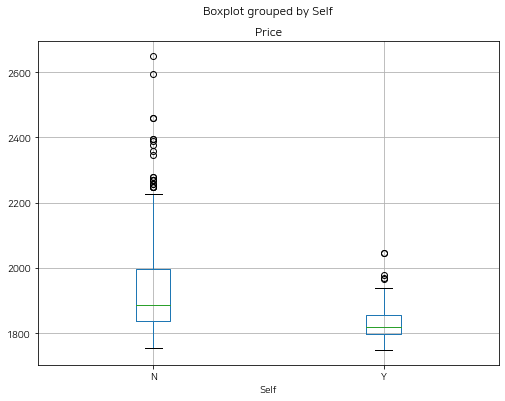

In [47]:
# barplot은 명목변수 빈도 비교할 때 더 좋음
# 가격은 연속변수. 따라서 boxplot이 더 좋음
station.boxplot(by="Self", column="Price", figsize=(8,6))

#### 2. 브랜드 / 가격

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'PRICE')

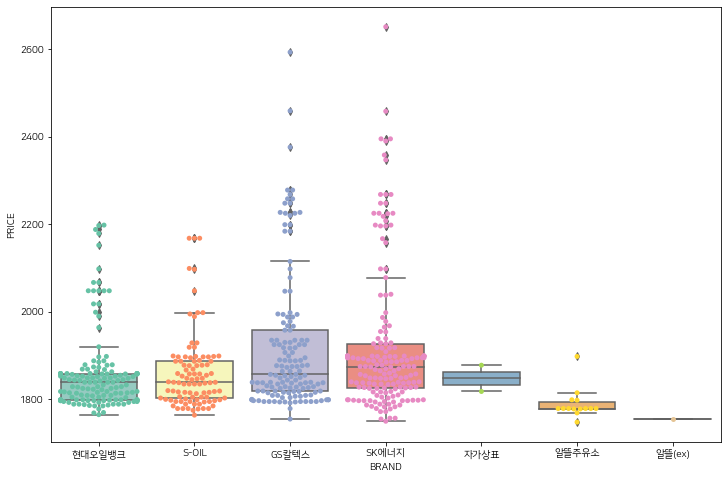

In [55]:
plt.figure(figsize = (12, 8))

sns.boxplot(x=station['Brand'], y=station['Price'], palette="Set3")
#sns.swarmplot : 그래프 위에 점으로 분포 현황을 알려준다.
sns.swarmplot(x=station['Brand'], y=station['Price'], palette="Set2")
plt.xlabel("BRAND")
plt.ylabel("PRICE")

#### 3. 구 / 가격

In [61]:
#### 서울시에서 주유 가격이 가장 비싼 곳은 어디인가?
station.sort_values(by="Price", ascending=False).head(10)
#### 서울시에서 주유 가격이 가장 저렴한 곳은 어디인가?
station.sort_values(by="Price", ascending=True).head(10)


#### 정렬은 'sort.values'

,Oil Store,Address,Price,Self,Brand,District
209,양천구주유소,서울 양천구 국회대로 275 (목동),1748.0,Y,알뜰주유소,양천구
234,동서울고속주유소,서울 동대문구 한천로 414,1750.0,Y,SK에너지,동대문구
175,만남의광장주유소,서울 서초구 양재대로12길 73-71,1754.0,Y,알뜰(ex),서초구
236,대성산업㈜청량리주유소,서울 동대문구 왕산로 289 (청량리동),1755.0,Y,GS칼텍스,동대문구
235,풍한주유소,서울 동대문구 안암로 168,1755.0,N,SK에너지,동대문구
344,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1757.0,Y,SK에너지,강서구
500,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1757.0,Y,SK에너지,강서구
532,덕릉로주유소,서울 강북구 덕릉로 158 (번동),1764.0,N,S-OIL,강북구
122,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1765.0,N,현대오일뱅크,도봉구
123,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1769.0,Y,현대오일뱅크,도봉구


In [67]:
geo_station = station.Price.groupby(station["District"]).mean()
geo_station

District
강남구     2015.571429
강동구     1932.600000
강북구     1805.153846
강서구     1848.281250
관악구     1871.384615
광진구     1829.200000
구로구     1852.363636
금천구     1833.000000
노원구     1854.571429
도봉구     1810.833333
동대문구    1812.105263
동작구     1855.200000
마포구     1915.416667
서대문구    1827.866667
서초구     1896.500000
성동구     1917.058824
성북구     1822.958333
송파구     1853.129032
양천구     1824.480000
영등포구    1881.370370
용산구     2228.153846
은평구     1816.125000
종로구     2089.888889
중구      2262.200000
중랑구     1816.785714
Name: Price, dtype: float64

In [69]:
#### 위의 구별 가격을 지도에 표시
import folium
import json

map = folium.Map(location=[37.413294, 127.269311], zoom_start=10)

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

geo_str = json.load(open(geo_path, encoding="utf-8"))

map.choropleth(geo_data = geo_str, data=geo_station, key_on='feature.id', columns=[geo_station.index, "Price"], fill_color="PuRd")
map

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [102]:
#### 지도에 가장 비싼 곳 10 곳, 가장 싼 곳 10 곳 마크해주기

exp = station.sort_values(by="Price", ascending=False).head(10).reset_index()
chp = station.sort_values(by="Price", ascending=True).head(10).reset_index()

del exp['index']
del chp['index']

exp
chp

,Oil Store,Address,Price,Self,Brand,District
0,양천구주유소,서울 양천구 국회대로 275 (목동),1748.0,Y,알뜰주유소,양천구
1,동서울고속주유소,서울 동대문구 한천로 414,1750.0,Y,SK에너지,동대문구
2,만남의광장주유소,서울 서초구 양재대로12길 73-71,1754.0,Y,알뜰(ex),서초구
3,대성산업㈜청량리주유소,서울 동대문구 왕산로 289 (청량리동),1755.0,Y,GS칼텍스,동대문구
4,풍한주유소,서울 동대문구 안암로 168,1755.0,N,SK에너지,동대문구
5,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1757.0,Y,SK에너지,강서구
6,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1757.0,Y,SK에너지,강서구
7,덕릉로주유소,서울 강북구 덕릉로 158 (번동),1764.0,N,S-OIL,강북구
8,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1765.0,N,현대오일뱅크,도봉구
9,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1769.0,Y,현대오일뱅크,도봉구


In [113]:

seoul_map = folium.Map(location=[37.497935, 127.027522], zoom_start=15)
seoul_map

# 구글 api
# for i in station :
#     tmp = gmaps.geocode(i, language='ko')
#     station_address.append(tmp[0].get("formatted_address"))

#     tmp_loc = tmp[0].get('geometry')
#     station_lat.append(tmp_loc['location']['lat'])
#     station_lng.append(tmp_loc['location']['lng'])

import requests

header = {"Authorization" : "KakaoAK 84253d6c27149bf24af2d67837343aa3"}

exp_lat = []
exp_lng = []
chp_lat = []
chp_lng = []

for i in exp.index:
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(exp['Address'][i].split(' (')[0])

    exp_lng.append(requests.get(url, headers = header).json()["documents"][0].get('x')) #request~['documents'] 결과값이 리스트로 묶고 다시 딕트로 .. 그래서 리스트 풀기 위해 [0] 
    exp_lat.append(requests.get(url, headers = header).json()["documents"][0].get('y'))

    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(chp['Address'][i].split(' (')[0])

    chp_lng.append(requests.get(url, headers = header).json()["documents"][0].get('x')) #request~['documents'] 결과값이 리스트로 묶고 다시 딕트로 .. 그래서 리스트 풀기 위해 [0] 
    chp_lat.append(requests.get(url, headers = header).json()["documents"][0].get('y'))


    marker = folium.Marker(location=[exp_lat[i], exp_lng[i]], icon=folium.Icon(color="red", icon="star"), popup=exp["Oil Store"][i])
    marker.add_to(seoul_map)
    marker = folium.Marker(location=[chp_lat[i], chp_lng[i]], icon=folium.Icon(color="green", icon="star"), popup=chp["Oil Store"][i])
    marker.add_to(seoul_map)

seoul_map


In [105]:
header = {"Authorization" : "KakaoAK 84253d6c27149bf24af2d67837343aa3"}
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(exp["Oil Store"][1])

# 결과값이 <Response [200]>이 뜨면 정상. 200은 성공이란 표시
# requests.get(url, headers = header)
# 불러오는 형식은 json이지만, 사용방법은 파이썬 딕트와 같다.
requests.get(url, headers = header).json()["documents"][0].get('x')
# requests.get(url, headers = header).json()["documents"].get('y')


'126.968973680782'

In [104]:
#### 주소 내 마지막 동 없애기
#### () 기준으로 split 한 다음 앞에 것만 가져오면 되!!!!!!

exp['Address'][0].split(' (')[0]
exp['Oil Store']

0              서남주유소
1              서계주유소
2              필동주유소
3    SK에너지(주) 퇴계로주유소
4            뉴서울(강남)
5            뉴서울(강남)
6             동자동주유소
7              약수주유소
8              강동주유소
9            선우상사Q엔느
Name: Oil Store, dtype: object

In [111]:
exp_lat

['37.5583624710728',
 '37.552339430427',
 '37.560888397210455',
 '37.5617318652342',
 '37.5176495710055',
 '37.5176495710055',
 '37.550217546860225',
 '37.558993985065825',
 '37.54046741033',
 '37.480501074414']

In [112]:
exp_lng

['126.972067727197',
 '126.968973680782',
 '126.99367314920487',
 '126.997147791816',
 '127.035735685446',
 '127.035735685446',
 '126.97247589929034',
 '127.01272807915872',
 '127.140700612161',
 '126.998611620395']